<a href="https://colab.research.google.com/github/yelxel/project-2-f1-data/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

1) Source of data

- http://ergast.com/mrd/ provides comprehensive access to motor racing data

2) Brief description of data

- "The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest 2021 season." [Source](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=constructors.csv)

3) What is the target?

- y = positionOrder, which represents a driver's final ranking in the race

4) Is this a classification or regression problem?

- Classification

5) How many features?

- 15 features

6) How many rows of data.

- 25660 rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

There may be some challenges in finding and addressing missing data, especially as this is a relatively large data set.

In [ ]:
races = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/races.csv')
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/2009,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/2009,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/2009,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [ ]:
drivers = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
constructors = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/constructors.csv')
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
results = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/results.csv')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
# merge datasets
df = pd.merge(results, races[['raceId', 'year','name', 'round']],on = 'raceId', how = 'left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [ ]:
# drop columns
df.drop(['number', 'position', 'positionText','laps','fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], axis = 1, inplace=True)
df.head()

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [ ]:
# rename columns
df.rename(columns={'rank':'fastestLapRank', 'name_x':'grandPrix', 'nationality_x':'driverNationality','name_y':'constructorName','nationality_y':'constructorNationality','driverRef':'driver'}, inplace=True)
df.head()

,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,year,grandPrix,round,driver,driverNationality,constructorName,constructorNationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [ ]:
#rearrange columns
df = df[['year', 'grandPrix', 'round', 'driver', 'constructorName', 'grid', 'positionOrder','points','time','milliseconds','fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'driverNationality','constructorNationality']]
df.head()

,year,grandPrix,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25660 non-null  int64  
 1   grandPrix               25660 non-null  object 
 2   round                   25660 non-null  int64  
 3   driver                  25660 non-null  object 
 4   constructorName         25660 non-null  object 
 5   grid                    25660 non-null  int64  
 6   positionOrder           25660 non-null  int64  
 7   points                  25660 non-null  float64
 8   time                    25660 non-null  object 
 9   milliseconds            25660 non-null  object 
 10  fastestLapRank          25660 non-null  object 
 11  fastestLapTime          25660 non-null  object 
 12  fastestLapSpeed         25660 non-null  object 
 13  driverNationality       25660 non-null  object 
 14  constructorNationality  25660 non-null

In [ ]:
# check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# check for missing values
df.isna().sum()

year                      0
grandPrix                 0
round                     0
driver                    0
constructorName           0
grid                      0
positionOrder             0
points                    0
time                      0
milliseconds              0
fastestLapRank            0
fastestLapTime            0
fastestLapSpeed           0
driverNationality         0
constructorNationality    0
dtype: int64

In [ ]:
# check for inconsistencies in data
df['year'].value_counts()

1989    620
1990    542
1991    539
1988    495
2012    480
       ... 
1951    179
1969    177
1957    171
1966    166
1950    160
Name: year, Length: 73, dtype: int64

In [ ]:
# check for inconsistencies in data for categorical values
df['grandPrix'].value_counts()

British Grand Prix               1833
Italian Grand Prix               1804
Monaco Grand Prix                1624
German Grand Prix                1599
Belgian Grand Prix               1537
French Grand Prix                1484
Canadian Grand Prix              1251
Spanish Grand Prix               1236
Brazilian Grand Prix             1143
United States Grand Prix          989
Hungarian Grand Prix              871
Australian Grand Prix             850
Austrian Grand Prix               841
Japanese Grand Prix               822
Dutch Grand Prix                  707
San Marino Grand Prix             667
South African Grand Prix          581
European Grand Prix               528
Mexican Grand Prix                478
Portuguese Grand Prix             453
Argentine Grand Prix              448
Malaysian Grand Prix              412
Indianapolis 500                  405
Bahrain Grand Prix                380
Chinese Grand Prix                342
Abu Dhabi Grand Prix              276
Singapore Gr

In [ ]:
# check for inconsistencies in data
df['round'].value_counts()

2     1800
6     1771
7     1769
5     1762
3     1754
8     1701
1     1698
4     1696
9     1585
10    1495
11    1385
12    1315
13    1262
14    1215
15    1140
16    1001
17     511
18     316
19     256
20     126
21      82
22      20
Name: round, dtype: int64

In [ ]:
# check for inconsistencies in data for categorical values
df['driver'].value_counts()

raikkonen             352
alonso                349
barrichello           326
button                309
michael_schumacher    308
                     ... 
crockett                1
broeker                 1
armi                    1
duncan                  1
facetti                 1
Name: driver, Length: 854, dtype: int64

In [ ]:
# check for inconsistencies in data for categorical values
df['constructorName'].value_counts()

Ferrari              2329
McLaren              1813
Williams             1567
Tyrrell               881
Team Lotus            871
                     ... 
De Tomaso-Ferrari       1
Fry                     1
McGuire                 1
MBM                     1
Derrington              1
Name: constructorName, Length: 210, dtype: int64

In [ ]:
# identify outliers
df.describe()


,year,round,grid,positionOrder,points
count,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000
mean,1990.029072,8.318550,11.187256,12.892673,1.854523
std,19.229104,4.904752,7.251983,7.721729,4.131527
min,1950.000000,1.000000,0.000000,1.000000,0.000000
25%,1976.000000,4.000000,5.000000,6.000000,0.000000
50%,1990.000000,8.000000,11.000000,12.000000,0.000000
75%,2007.000000,12.000000,17.000000,18.000000,2.000000
max,2022.000000,22.000000,34.000000,39.000000,50.000000


In [ ]:
corr = df.corr()


There is a moderate negative correlation of .57 between the points and final positionOrder of a driver in each race.


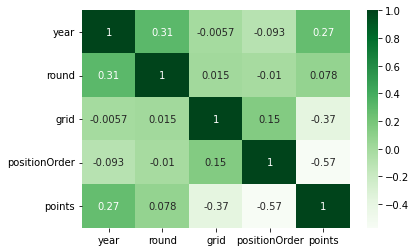

In [ ]:
sns.heatmap(corr, cmap = 'Greens', annot = True)
print('There is a moderate negative correlation of .57 between the points and final positionOrder of a driver in each race.')